# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [5]:
path='/home/akshit/Documents/M.Sc./GRB/data/fermi202.xlsx'

In [6]:
data=pd.read_excel(path)

In [7]:
data.head(3)

,name,t90,t50,pflx_plaw_index,pflx_plaw_phtflux,pflx_comp_epeak,pflx_comp_index
0,GRB080714086,5.376,2.816,-1.355209,1.921076,683.2227,-0.727978
1,GRB080714425,40.192,11.776,NaN,NaN,NaN,NaN
2,GRB080714745,59.649,25.088,-1.571910,6.959844,298.8300,-0.832917


In [9]:
x=np.log(data['t90'])
y=np.log(data['t50'])

In [13]:
d=pd.DataFrame()
d[0]=x
d[1]=y

In [11]:
N = np.arange(1, 11)
models = [None for i in range(len(N))]

# Gaussian MIxture Model

Minimum BIC will give Optimal Number of cluster

In [14]:
for i in range(len(N)):
    models[i] = GaussianMixture(N[i], init_params='kmeans').fit(d)

# compute the AIC and the BIC

AIC1 = [m.aic(d) for m in models]
BIC1 = [m.bic(d) for m in models]

In [15]:
index = BIC1.index(min(BIC1))
index= index
print("Index where BIC is minimum:", index)

# Calculate differences between consecutive BIC values

differences = [BIC1[i + 1] - BIC1[i] for i in range(len(BIC1) - 1)]
print("Differences between consecutive BIC values:", differences)

Index where BIC is minimum: 3
Differences between consecutive BIC values: [-1100.7923967463612, 58.387425940454705, -273.5221208140938, 95.46125254291474, -9.767123716839706, 35.587491076687, 64.76063419479033, 1.4312811374256853, 18.261134775038954]


In [20]:
M_best = models[index]
gmm = M_best.fit(d)

In [25]:
def plot_clusters(data, gmm):
    labels = gmm.predict(data)
    fig, ax = plt.subplots(figsize=(5, 5))
    colors = ['r', 'yellow', 'g', 'blue']  # Update colors if more clusters are predicted
    for label, color in zip(range(gmm.n_components), colors):
        subset = data[labels == label]
        ax.scatter(subset[0], subset[1], c=color)
    ax.scatter(np.log(2.048), np.log(1.280), c='black')
    ax.annotate("GRB170817", (np.log(2.048), np.log(1.280)))
    ax.set_xlabel('$Log(t90)$')
    ax.set_ylabel('$log(t50)$')
    plt.show()

def plot_bic(N, BIC):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(N, BIC, '--k', label='BIC')
    ax.set_xlabel('n. components')
    ax.set_ylabel('information criterion')
    ax.legend(loc=2)
    plt.show()

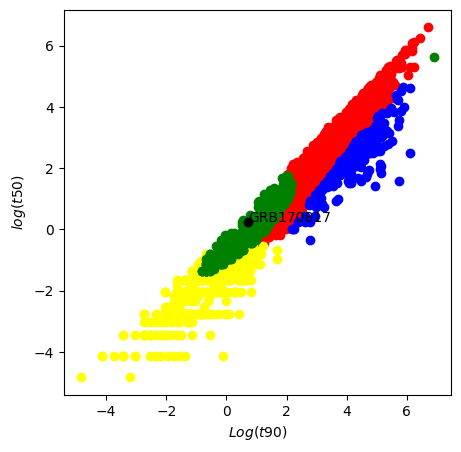

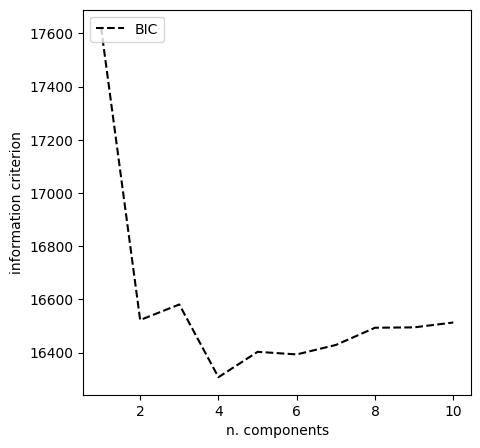

In [29]:
plot_clusters(d, gmm)
plot_bic(N, BIC1)
